In [2]:
%load_ext autoreload
%autoreload 2

# Phonation Mode Classification

This classification is just for 2 phonation modes (for the partciipant used for building this model) and might need extending based on the participant used. This would also require labelleing unlabelled participants phonation modes.

## 1. A simple KNN classifier

As the phonation classification for this is simply a 2 way classification task, a KNN should be sufficient for the task. Therefore it is the forst thing tested. However, of course should the phonation modes supported increase, then the classification task would become more complex and using a simple KNN would liekly not suffice.

In [10]:
from scripts.phonation_classifier_knn import train_and_test_knn, evaluate_model, plot_confusion_matrix
DATA_FILE = 'data/voice_data_thesis_preprocessed.csv'

### 1.1 Complete data

0.9859178682856902


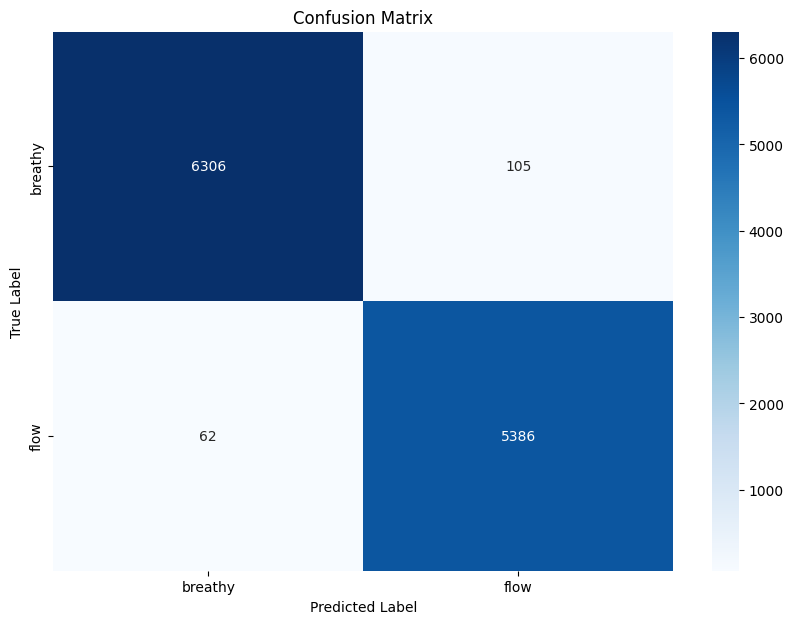

In [13]:
# Train and test the model -- dont drop any columns all modalities
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer')
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### 1.2 Audio Only

In [14]:
modalities = [
    "audio"
]

#### 1.2.1 All audio features

0.8764651319672823


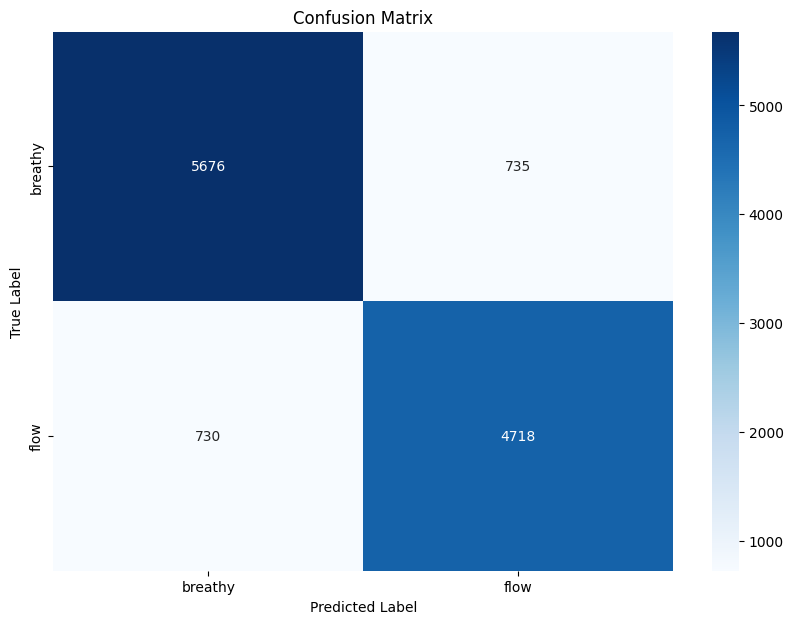

In [15]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### 1.2.2 Top 5 audio features

Index(['computer rms energy', 'computer spec slope', 'computer spec decrease',
       'computer mfcc fb40 1', 'computer mfcc fb40 3'],
      dtype='object')
0.8178598532759929


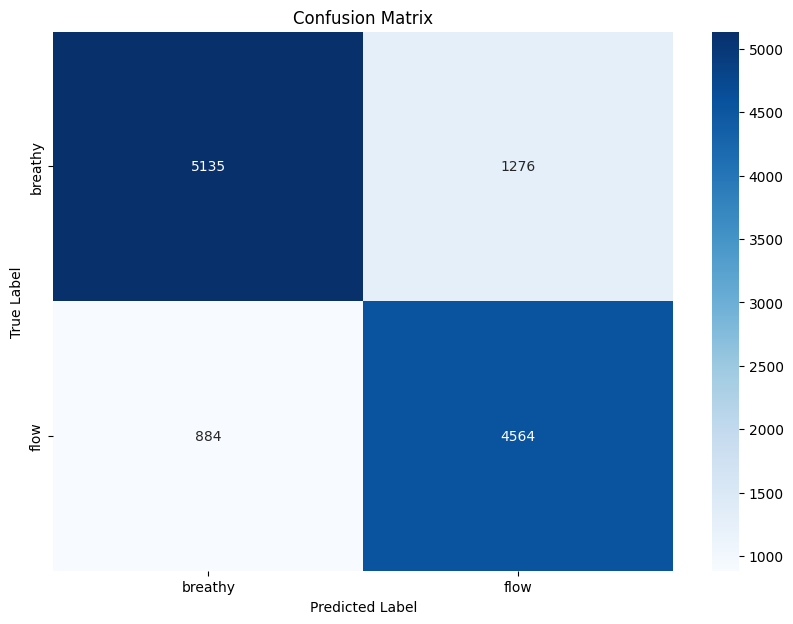

In [16]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', num_features=5, modalities=modalities)
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### 2.1.2 Video Only

In [17]:
modalities = [
    "video"
]

0.9999156758579981


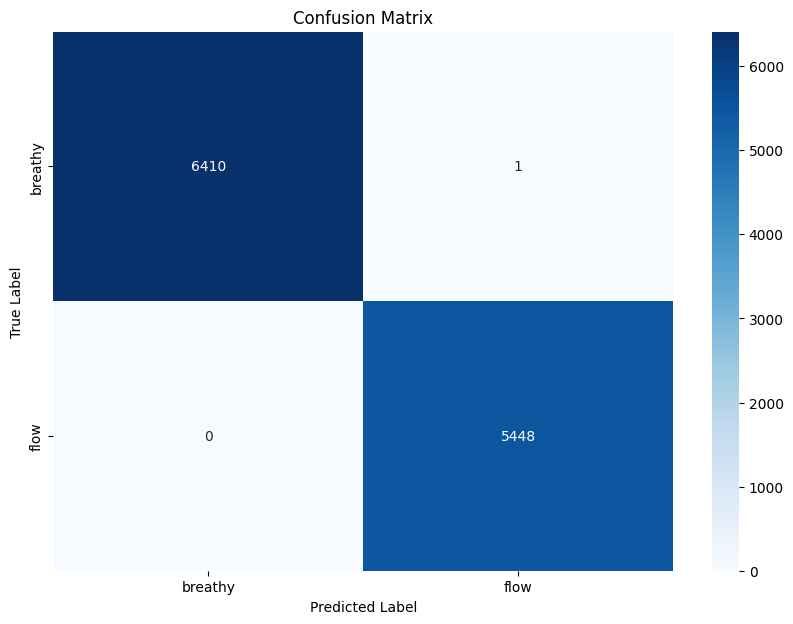

In [18]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(conf_matrix, class_names=class_names)

This result is distorted, because the two phonation modes for this participant were recorded on different days, so the clothes worn etc, were likely different, impacting the result of claasification. 

Index(['computer pose_landmark_24_z', 'computer pose_landmark_25_z',
       'computer pose_landmark_28_z', 'computer pose_landmark_30_z',
       'computer pose_landmark_32_z'],
      dtype='object')


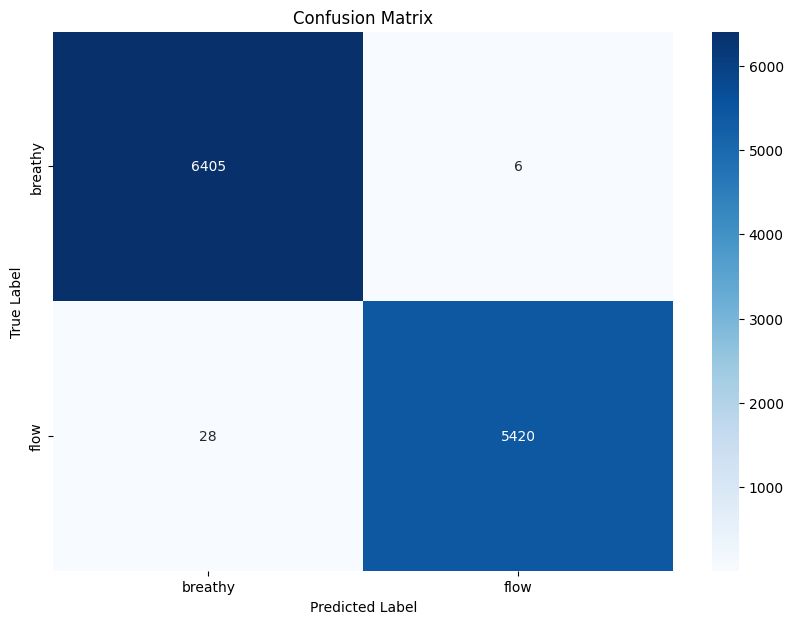

In [19]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', num_features=5, audio_source='computer', modalities=modalities)
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

accuracy

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### 2.1.3 Biosignal Data Only

In [20]:
modalities = [
    "biosignals"
]

0.9967113584619276


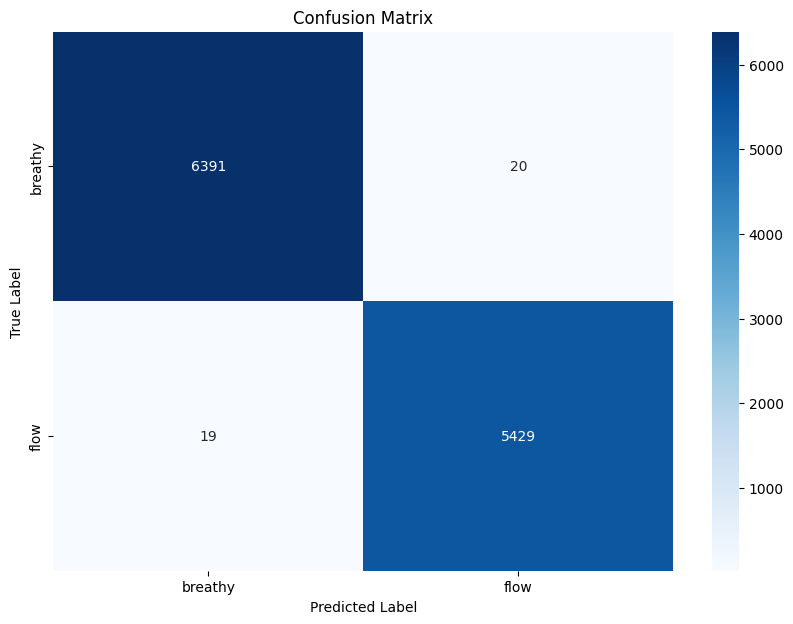

In [21]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, conf_matrix = evaluate_model(y_test, y_pred)

print(accuracy)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### 2.2 MLP classifier

Using multilayer perceptron model could prove better for more complex classification tasks. Used in Furkan thesis/paper in phonation mode classification.